In [1]:
##DESCRIPTIVE VIS##
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
#df=pd.read_csv('peopleByBirthYears.csv')
#df.describe()
import numpy as np
from scipy import stats

In [2]:
rates=pd.read_csv('categoryMembershipRates.csv', index_col=0)

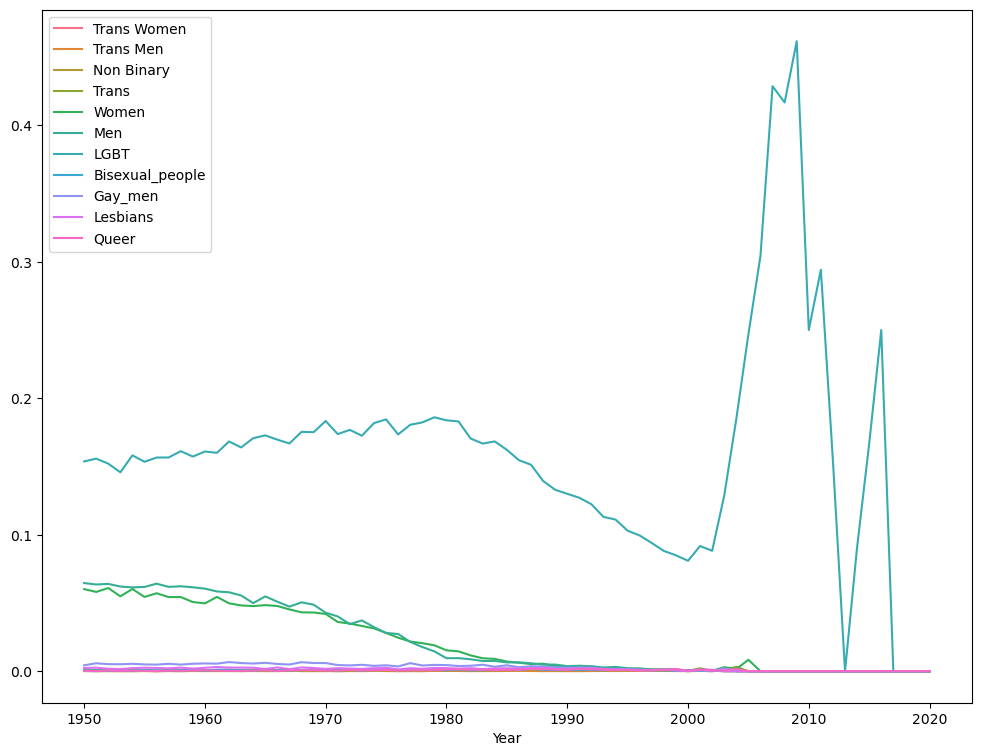

In [5]:
fig, axes=pyplot.subplots(figsize=(12,9))

sns.lineplot(ax=axes, data=rates, dashes=False)
axes.grid(False)
pyplot.show()

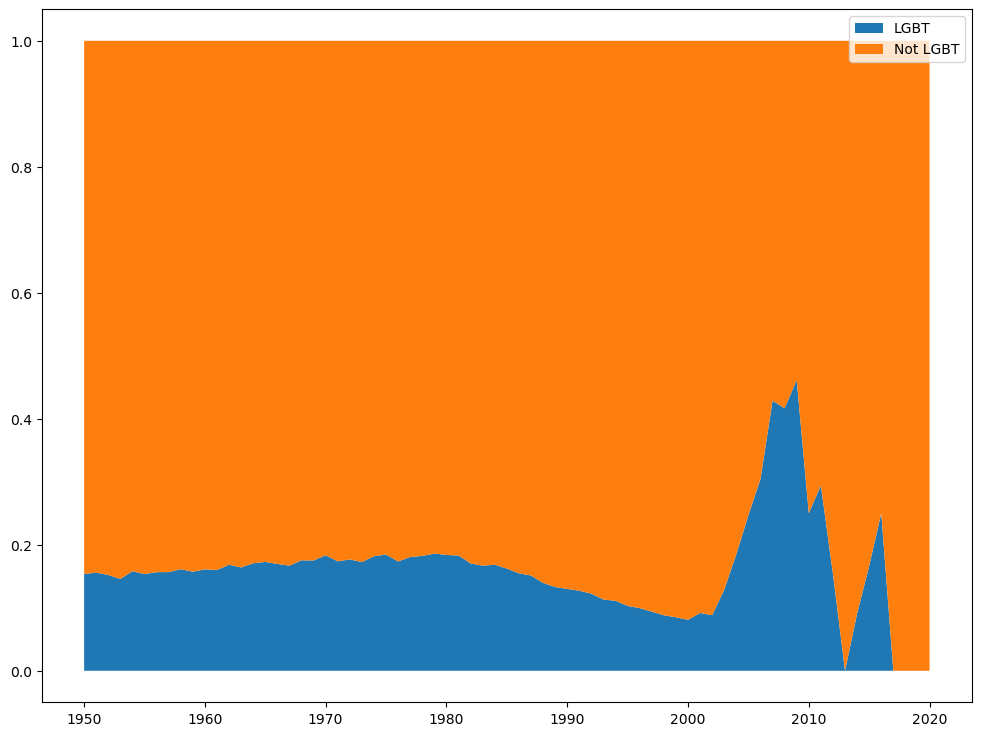

In [6]:
fig, axes=pyplot.subplots(figsize=(12,9))

axes.fill_between(rates.index, rates['LGBT'], 0)
axes.fill_between(rates.index, rates['LGBT'],1)
axes.grid(False)
axes.legend(['LGBT','Not LGBT'])
pyplot.show()

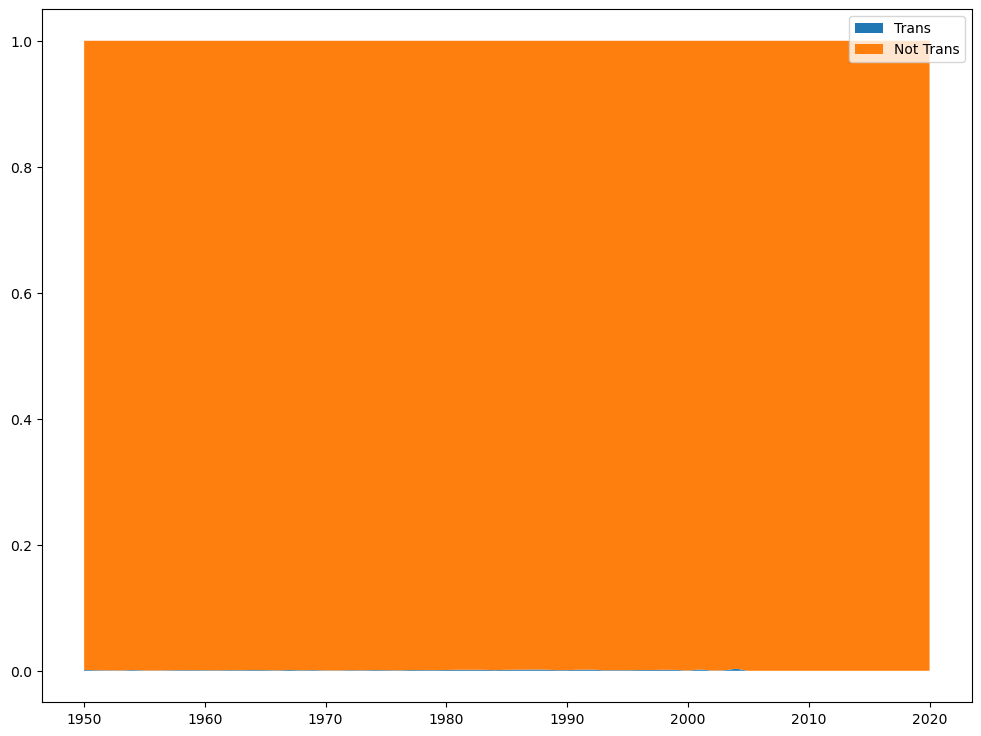

In [7]:
fig, axes=pyplot.subplots(figsize=(12,9))
axes.grid(False)
axes.fill_between(rates.index, rates['Trans'], 0)
axes.fill_between(rates.index, rates['Trans'],1)
axes.legend(['Trans','Not Trans'])
pyplot.show()

In [4]:
data=pd.read_csv('peopleByBirthYears.csv')

C:\Users\Jack\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Big Broad stuff

In [3]:
df=pd.read_csv('peopleByBirthYears.csv')
df.head()

,Name,Year,inTransWomen,inTransMen,inNB,inTrans,inWomen,inMen,inLGBT,inBisexual_people,inGay_men,inLesbians,inQueer,links,categories,QID
0,Kjell Aamot,1950,False,False,False,False,False,False,False,False,False,False,False,"['BI Norwegian Business School', 'Verdens Gang']","['Category:1950 births', 'Category:BI Norwegia...",Q11980824
1,Olav Aaraas,1950,False,False,False,False,False,False,False,False,False,False,False,"['Fredrikstad', 'Maihaugen', 'Norwegian Museum...","['Category:1950 births', 'Category:Directors o...",Q3431302
2,Marc Aaronson,1950,False,False,False,False,False,False,False,False,False,False,False,"['United States', 'Astronomer', 'Los Angeles, ...","['Category:1950 births', 'Category:1987 deaths...",Q2258893
3,Ülle Aaskivi,1950,False,False,False,False,True,False,False,False,False,False,False,"['1990 Estonian Supreme Soviet election', 'Con...","['Category:1950 births', 'Category:2007 deaths...",Q16407530
4,Oğuz Abadan,1950,False,False,False,False,False,False,False,False,False,False,False,"['Turkey', 'Ankara', 'Mandolin', 'Gazi Univers...","['Category:1950 births', 'Category:Living peop...",Q7116769


In [8]:
gayBool=df['categories'].str.contains('Category:LGBT')

In [9]:
print(gayBool)

0         False
1         False
2         False
3         False
4         False
          ...  
743214    False
743215    False
743216    False
743217    False
743218    False
Name: categories, Length: 743219, dtype: bool


In [10]:
gayBool.describe()

count     743219
unique         2
top        False
freq      734830
Name: categories, dtype: object

In [42]:
gay=df[gayBool]
gay.head()
notGay=df[gayBool==False]
notGay.head()

,Name,Year,inTransWomen,inTransMen,inNB,inTrans,inWomen,inMen,inLGBT,inBisexual_people,inGay_men,inLesbians,inQueer,links,categories,QID,numLinks
0,Kjell Aamot,1950,False,False,False,False,False,False,False,False,False,False,False,"[BI Norwegian Business School, Verdens Gang]","['Category:1950 births', 'Category:BI Norwegia...",Q11980824,2
1,Olav Aaraas,1950,False,False,False,False,False,False,False,False,False,False,False,"[Fredrikstad, Maihaugen, Norwegian Museum of C...","['Category:1950 births', 'Category:Directors o...",Q3431302,4
2,Marc Aaronson,1950,False,False,False,False,False,False,False,False,False,False,False,"[United States, Astronomer, Los Angeles, Calif...","['Category:1950 births', 'Category:1987 deaths...",Q2258893,41
3,Ülle Aaskivi,1950,False,False,False,False,True,False,False,False,False,False,False,"[1990 Estonian Supreme Soviet election, Consti...","['Category:1950 births', 'Category:2007 deaths...",Q16407530,34
4,Oğuz Abadan,1950,False,False,False,False,False,False,False,False,False,False,False,"[Turkey, Ankara, Mandolin, Gazi University, Un...","['Category:1950 births', 'Category:Living peop...",Q7116769,21


In [14]:
print(len(gay)/(len(gay)+len(notGay)))

0.01128738635583859


Only 1.129% of people are under LGBT in some capacity. Overall, very underrepresented (for reference, https://news.gallup.com/poll/329708/lgbt-identification-rises-latest-estimate.aspx estimates ~5.6% of U.S. adults are LGBT, other sources have claimed anywhere from 2.5-10% of people are LGBT). But we can slice by decades since pre-stonewall era may be skewing our data.

In [25]:
for i in range(1950,2019,10):
    #print(i, i+10)
    #break
    numGay=len(pd.concat([gay[gay['Year']>=i], gay[gay['Year']<i+10]],join='inner'))
    numStr8=len(pd.concat([notGay[notGay['Year']>=i], notGay[notGay['Year']<i+10]],join='inner'))
    print(str(i)+': '+str(numGay/(numGay+numStr8)))
    

1950: 0.011387110658367375
1960: 0.011732600497056133
1970: 0.011440782814081656
1980: 0.011311515780493489
1990: 0.010692007308749083
2000: 0.011133116442462647
2010: 0.011286004493414591


In [26]:
for i in range(1950,2020,1):
    #print(i, i+10)
    #break
    numGay=len(pd.concat([gay[gay['Year']>=i], gay[gay['Year']<i+1]],join='inner'))
    numStr8=len(pd.concat([notGay[notGay['Year']>=i], notGay[notGay['Year']<i+1]],join='inner'))
    print(str(i)+': '+str(numGay/(numGay+numStr8)))
    

1950: 0.0112786077737302
1951: 0.011305931582856856
1952: 0.011277033577506161
1953: 0.0112746484270729
1954: 0.011302808528626912
1955: 0.011313191633285067
1956: 0.01130176342381613
1957: 0.011306368369116799
1958: 0.011337862489944136
1959: 0.011291653736704148
1960: 0.011323120788315193
1961: 0.011348945065770794
1962: 0.01137104673296917
1963: 0.01135171166652367
1964: 0.011343476511749072
1965: 0.011328262172502199
1966: 0.011329438838732518
1967: 0.011299830443119213
1968: 0.011348515729779393
1969: 0.011350444308419697
1970: 0.011319351303446447
1971: 0.011311963506220591
1972: 0.011288355864296912
1973: 0.011278483352256225
1974: 0.011311458528612657
1975: 0.01132387850430273
1976: 0.011246840497073128
1977: 0.011343569601609085
1978: 0.011283667251237429
1979: 0.011346212413858569
1980: 0.01129667954075109
1981: 0.011308372806162504
1982: 0.011292323169013529
1983: 0.0113095747552489
1984: 0.011253170671991596
1985: 0.011308152076690763
1986: 0.01128178962138477
1987: 0.01131

The proportion remains shockingly consistent over time, so we can safely rule out past stigmatization for significantly pulling down the overall average. 

In [53]:
print('Category: | Count | % of LGBT People | % of Total People')
rainbows=['Category:Transgender and transsexual men','Category:Transgender and transsexual women','Category:People with non-binary gender identities','Category:Bisexual men','Category:Bisexual women','Category:Lesbians','Category:Gay men']
for item in rainbows:
    d=df[df['categories'].str.contains(item)]
    print(item.strip('Category:')+': '+str(len(d))+' | '+str(len(d)/len(gay))+' | '+str(len(d)/len(df)))

Category: | Count | % of LGBT People | % of Total People
Transgender and transsexual men: 96 | 0.011443557038979616 | 0.00012916784958403915
Transgender and transsexual women: 359 | 0.04279413517701752 | 0.00048303393750697977
People with non-binary gender identities: 12 | 0.001430444629872452 | 1.6145981198004894e-05
Bisexual men: 136 | 0.016211705805221122 | 0.00018298778691072215
Bisexual women: 270 | 0.03218500417213017 | 0.0003632845769551101
Lesbians: 75 | 0.008940278936702826 | 0.00010091238248753059
Gay men: 196 | 0.023363928954583384 | 0.0002637176929007466


Again, these values are all very very low. 

Now, lets look at the average number of links on gay vs not gay pages

In [36]:
df['links']=df['links'].apply(lambda s:list(str(s).strip('[]').replace('\'','').replace('Category:','').split(', ')))
df['numLinks']=df['links'].str.len()

In [37]:
df.head(10)

,Name,Year,inTransWomen,inTransMen,inNB,inTrans,inWomen,inMen,inLGBT,inBisexual_people,inGay_men,inLesbians,inQueer,links,categories,QID,numLinks
0,Kjell Aamot,1950,False,False,False,False,False,False,False,False,False,False,False,"[BI Norwegian Business School, Verdens Gang]","['Category:1950 births', 'Category:BI Norwegia...",Q11980824,2
1,Olav Aaraas,1950,False,False,False,False,False,False,False,False,False,False,False,"[Fredrikstad, Maihaugen, Norwegian Museum of C...","['Category:1950 births', 'Category:Directors o...",Q3431302,4
2,Marc Aaronson,1950,False,False,False,False,False,False,False,False,False,False,False,"[United States, Astronomer, Los Angeles, Calif...","['Category:1950 births', 'Category:1987 deaths...",Q2258893,41
3,Ülle Aaskivi,1950,False,False,False,False,True,False,False,False,False,False,False,"[1990 Estonian Supreme Soviet election, Consti...","['Category:1950 births', 'Category:2007 deaths...",Q16407530,34
4,Oğuz Abadan,1950,False,False,False,False,False,False,False,False,False,False,False,"[Turkey, Ankara, Mandolin, Gazi University, Un...","['Category:1950 births', 'Category:Living peop...",Q7116769,21
5,Ahmet Abakay,1950,False,False,False,False,False,True,False,False,False,False,False,"[Crypto-Armenians, Sivas Province, Divriği, Er...","['Category:1950 births', 'Category:Living peop...",Q15455294,9
6,Martine Aballéa,1950,False,False,False,False,True,False,True,False,False,False,False,"[Installation art, Performance art, Art in Gen...","['Category:1950 births', 'Category:20th-centur...",Q25873672,22
7,Gadzhi Abashilov,1950,False,False,False,False,False,False,False,False,False,False,False,"[Russian language, Russia, Republic of Dagesta...","['Category:1950 births', 'Category:2008 deaths...",Q635797,16
8,Kamil Al-Abbasi,1950,False,False,False,False,False,False,False,False,False,False,False,"[Sprint (running), ""Athletics at the 1976 Summ...","['Category:1950 births', 'Category:Athletes (t...",Q38284370,3
9,Aslan Abbasov,1950,False,False,False,False,False,False,False,False,False,False,False,"[New Azerbaijan Party, National Assembly (Azer...","['Category:1950 births', 'Category:2021 deaths...",Q16364707,2


In [54]:
print(np.mean(df['numLinks']),np.std(df['numLinks']))
print(np.mean(gay['numLinks']),np.std(gay['numLinks']))
print(np.mean(notGay['numLinks']),np.std(notGay['numLinks']))

23.43082590730323 34.4764260996751
47.29061866730242 59.002428949730216
23.158436645210458 33.99819125368206


Interestingly, there are on average twice as many links on the pages of LGBT individuals than non LGBT pages

In [49]:
gay['numLinks'].describe()

count    8389.000000
mean       47.290619
std        59.005946
min         1.000000
25%        17.000000
50%        31.000000
75%        54.000000
max       800.000000
Name: numLinks, dtype: float64

In [50]:
notGay['numLinks'].describe()

count    734830.000000
mean         23.158437
std          33.998214
min           1.000000
25%           6.000000
50%          14.000000
75%          27.000000
max        1558.000000
Name: numLinks, dtype: float64

In [51]:
df['numLinks'].describe()

count    743219.000000
mean         23.430826
std          34.476449
min           1.000000
25%           6.000000
50%          14.000000
75%          27.000000
max        1558.000000
Name: numLinks, dtype: float64

### Comparing Lists and Categories

In [3]:
listBi=pd.read_csv('lists\\List_of_bisexual_people.csv',index_col=0,keep_default_na=False)
listLGB=pd.read_csv('lists\\List_of_gay,_lesbian_or_bisexual_people.csv',index_col=0,keep_default_na=False)
listLGBTPoliticians=pd.read_csv('lists\\List_of_LGBT_politicians_in_the_United_States.csv',index_col=0,keep_default_na=False)
listLGBTRightsActivists=pd.read_csv('lists\\List_of_LGBT_rights_activists.csv',index_col=0,keep_default_na=False)
listLGBTAthletes=pd.read_csv('lists\\List_of_LGBT_sportspeople.csv',index_col=0,keep_default_na=False)
listPan=pd.read_csv('lists\\List_of_pansexual_people.csv',index_col=0,keep_default_na=False)
listNB=pd.read_csv('lists\\List_of_people_with_non-binary_gender_identities.csv',index_col=0,keep_default_na=False)
listTrans=pd.read_csv('lists\\List_of_transgender_people.csv',index_col=0,keep_default_na=False)

In [75]:
df=pd.read_csv('mergedPeople.csv',index_col=0,keep_default_na=False)

C:\Users\Jack\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [72]:
df.head()

,Name,Year,inTransWomen,inTransMen,inNB,inTrans,inWomen,inMen,inLGBT,inBisexual_people,...,P21,P21ref,P91,P91ref,P6553,P6553ref,pronounsEn,trans,gay,queer
53,Joe Acanfora,1950.0,False,False,False,False,False,False,True,False,...,male,,,,,,,False,False,False
1039,Linda Bellos,1950.0,False,False,False,False,False,False,True,False,...,female,,,,,,,False,False,False
1275,Anne Bishop (activist),1950.0,False,False,False,False,False,False,True,False,...,female,,,,,,,False,False,False
1705,John Hein (editor),1957.0,False,False,False,False,False,False,True,False,...,,,,,,,,False,False,False
2513,James Rennie (activist),1971.0,False,False,False,False,False,False,True,False,...,,,,,,,,False,False,False


In [76]:
df=df[df['Name']!='']

In [110]:
indLGBTPoliticiansUS=[]
for index,row in df.iterrows():
    
    
    if ('Category:LGBT politicians from the United States' in row['categories']):
        indLGBTPoliticiansUS.append(index)
    elif ('Category:LGBT mayors of places in the United States' in row['categories']):
        indLGBTPoliticiansUS.append(index)
    elif ('Category:LGBT members of the United States Congress' in row['categories']):
        indLGBTPoliticiansUS.append(index)    
    elif ('Category:LGBT appointed officials in the United States' in row['categories']):
        indLGBTPoliticiansUS.append(index)
    elif ('Category:LGBT state governors of the United States' in row['categories']):
        indLGBTPoliticiansUS.append(index)         

df.iloc[indLGBTPoliticiansUS,:].to_csv('cats\\catLGBTPoliticians.csv')




In [112]:
indLGBTActivists=[]
for index,row in df.iterrows():
    
    
    if ('Category:Transgender rights activists' in row['categories']):
        indLGBTActivists.append(index)
    elif ('Category:LGBT rights activists' in row['categories']):
        indLGBTActivists.append(index)
    
        
dq=df.iloc[indLGBTActivists,:]
dq=dq[dq['queer']==True]
dq.head()

,Name,Year,inTransWomen,inTransMen,inNB,inTrans,inWomen,inMen,inLGBT,inBisexual_people,...,P21,P21ref,P91,P91ref,P6553,P6553ref,pronounsEn,trans,gay,queer
6824,Bertrand Delanoë,1950.0,False,False,False,False,False,True,True,False,...,male,,homosexuality,,,,,False,True,True
7356,Beth Elliott,1950.0,True,False,False,True,False,False,True,False,...,transgender female,,lesbianism,,,,,True,True,True
8963,Brent Hawkes,1950.0,False,False,False,False,False,True,True,False,...,male,,homosexuality,,,,,False,True,True
10562,Henk Krol,1950.0,False,False,False,False,False,True,True,False,...,male,,homosexuality,,,,,False,True,True
12245,Maryam Khatoon Molkara,1950.0,True,False,False,True,False,False,True,False,...,transgender female,,,,,,,True,False,True


In [113]:
dq.to_csv('cats\\catLGBTActivists.csv')

In [62]:
indTrans=[]
for index,row in df.iterrows():
    
    
    if ('Category:Transgender and transsexual men' in row['categories']):
        indTrans.append(index)
    elif ('Category:Transgender and transsexual women' in row['categories']):
        indTrans.append(index)
    elif ('Category:Transgender non-binary people' in row['categories']):
        indTrans.append(index)
        

df.iloc[indTrans,:].to_csv('cats\\catTrans.csv')


In [65]:
indLGB=indBi
for index,row in df.iterrows():
    
    
    if ('Category:Lesbians' in row['categories']):
        indLGB.append(index)
    elif ('Category:Gay men' in row['categories']):
        indLGB.append(index)
        
df.iloc[indLGB,:].to_csv('cats\\catLGB.csv')


In [79]:
indBi=[]
for index,row in df.iterrows():
    
    
    if ('Category:Bisexual men' in row['categories']):
        indBi.append(index)
    elif ('Category:Bisexual women' in row['categories']):
        indBi.append(index)
        
#df.iloc[indBi,:].to_csv('cats\\catBi.csv')
bi=df.iloc[indBi,:]

In [118]:
indPan=[]
for index,row in df.iterrows():
    
    
    if ('Category:Pansexual men' in row['categories']):
        indPan.append(index)
    elif ('Category:Pansexual women' in row['categories']):
        indPan.append(index)
    elif ('Category:Pansexual people' in row['categories']):
        indPan.append(index)
df.iloc[indPan,:].to_csv('cats\\catPan.csv')


In [67]:
indLGBTAthletes=[]
for index,row in df.iterrows():
    
    
    if ('Category:Lesbian sportswomen' in row['categories']):
        indLGBTAthletes.append(index)
    elif ('Category:Bisexual sportspeople' in row['categories']):
        indLGBTAthletes.append(index)
    elif ('Category:Gay sportsmen' in row['categories']):
        indLGBTAthletes.append(index)
    elif ('Category:Non-binary sportspeople' in row['categories']):
        indLGBTAthletes.append(index)
    elif ('Category:Transgender and Transsexual sportspeople' in row['categories']):
        indLGBTAthletes.append(index)
        
df.iloc[indLGBTAthletes,:].to_csv('cats\\catLGBTAthletes.csv')

##### List v Category breakdown

Bisexual -- List: 479, Category: 313, Both: 99

LGB -- List: 5657, Category: 404, Both: 283

Politicians -- List: 44, Category: 886, Both: 0

Athletes -- List: 289, Category: 401, Both: 367

In [103]:
def overlap(d,s):
    ds=d.merge(s, how='outer',on='Name',indicator='membership')
    ds['membership']=ds['membership'].replace({'left_only':'category','right_only':'list'})
    l=ds[ds['membership']=='list']
    c=ds[ds['membership']=='category']
    b=ds[ds['membership']=='both']
    print('List: %d, Category: %d, Both: %d' %(len(l), len(c), len(b)))
    return(ds,l,c,b)

In [119]:
de=overlap(df.iloc[indPan,:],listPan)
de[0].to_csv('overlap\\overlapPan.csv')

KeyError: 'Name'

In [120]:
listPan.head()

,".mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:""[ ""}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:"" ]""}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}.mw-parser-output .infobox .navbar{font-size:100%}.mw-parser-output .navbox .navbar{display:block;font-size:100%}.mw-parser-output .navbox-title .navbar{float:left;text-align:left;margin-right:0.5em}vteLGBT people",".mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:""[ ""}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:"" ]""}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}.mw-parser-output .infobox .navbar{font-size:100%}.mw-parser-output .navbox .navbar{display:block;font-size:100%}.mw-parser-output .navbox-title .navbar{float:left;text-align:left;margin-right:0.5em}vteLGBT people.1"
0,Overall,African Americans Jews Catholics Politicians i...
1,Non-heterosexuals,Pansexuals Sexually fluid people Lesbian filmm...
2,LGB,A Ba–Bh Bi–Bz C D–E F G H I–J K L M N–O P–Q R ...
3,Bisexuals,A–F G–M N–S T–Z
4,Transgender people,Murder victims Political office-holders


In [98]:
print('List: %d, Category: %d, Both: %d' %(len(l), len(c), len(b)))

List: 479, Category: 313, Both: 99


### NLP Stats

In [2]:
df=pd.read_csv('wikipages_nlp.csv',index_col=0)
df.head()

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
dd=pd.read_csv('mergedPeople.csv',index_col=0,keep_default_na=False)
dd.head()

In [28]:
dd=dd[dd['Name']!='']
len(dd)

747787

In [29]:
df=df.merge(dd[['Name','trans','gay','queer']],how='left', on='Name')

In [31]:
df=df.drop(['inLGBT','inBisexual_people','inGay_men','inLesbians','inQueer','links','categories'], axis=1)
df.head()

KeyError: '[3 4 5 6 7 8 9 10 11 12 13 14] not found in axis'

In [32]:
df.describe()

,Year,text,vader_compound,vader_neg,vader_neu,vader_pos,empath_help,empath_office,empath_dance,empath_money,...,empath_weapon,empath_children,empath_monster,empath_ocean,empath_giving,empath_contentment,empath_writing,empath_rural,empath_positive_emotion,empath_musical
count,748071.000000,0.0,748071.0,748071.0,748071.0,748071.0,748071.0,748071.0,748071.0,748071.0,...,748071.0,748071.0,748071.0,748071.0,748071.0,748071.0,748071.0,748071.0,748071.0,748071.0
mean,1975.147177,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,14.383807,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1950.000000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1963.000000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1976.000000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1987.000000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2020.000000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
for col in df.columns:
    print(df[col].describe())

count             748071
unique            743080
top       Rodrigo Osorio
freq                   9
Name: Name, dtype: object
count    748071.000000
mean       1975.147177
std          14.383807
min        1950.000000
25%        1963.000000
50%        1976.000000
75%        1987.000000
max        2020.000000
Name: Year, dtype: float64
count     748071
unique         2
top        False
freq      747594
Name: inTransWomen, dtype: object
count     748071
unique         2
top        False
freq      747965
Name: inTransMen, dtype: object
count     748071
unique         2
top        False
freq      747778
Name: inNB, dtype: object
count     748071
unique         2
top        False
freq      747212
Name: inTrans, dtype: object
count     748071
unique         2
top        False
freq      727157
Name: inWomen, dtype: object
count     748071
unique         2
top        False
freq      583117
Name: inMen, dtype: object
count     748071
unique         2
top        False
freq      631976
Name: inLG

count    748071.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: empath_tourism, dtype: float64
count    748071.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: empath_furniture, dtype: float64
count    748071.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: empath_school, dtype: float64
count    748071.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: empath_magic, dtype: float64
count    748071.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: empath_beach, dtype: float64
count    748071.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%     

count    748071.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: empath_water, dtype: float64
count    748071.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: empath_sports, dtype: float64
count    748071.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: empath_death, dtype: float64
count    748071.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: empath_healing, dtype: float64
count    748071.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: empath_legend, dtype: float64
count    748071.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%        

count    748071.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: empath_sound, dtype: float64
count    748071.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: empath_injury, dtype: float64
count    748071.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: empath_sailing, dtype: float64
count    748071.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: empath_rage, dtype: float64
count    748071.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: empath_science, dtype: float64
count    748071.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%        

count    748071.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: empath_law, dtype: float64
count    748071.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: empath_friends, dtype: float64
count    748071.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: empath_payment, dtype: float64
count    748071.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: empath_achievement, dtype: float64
count    748071.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: empath_alcohol, dtype: float64
count    748071.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%  

In [18]:
dTrans=df[df['trans']==True]
dCis=df[df['trans']==False]

In [19]:
dGay=df[df['gay']==True]
dHet=df[df['gay']==False]

In [20]:
dQueer=df[df['queer']==True]
dCisHet=df[df['queer']==False]

In [16]:
nlp=pd.read_csv('wikipages_nlp.csv',keep_default_na=False,index_col=0)
nlp.head()

C:\Users\Jack\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (217,218) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Name,Year,inTransWomen,inTransMen,inNB,inTrans,inWomen,inMen,inLGBT,inBisexual_people,...,empath_contentment,empath_writing,empath_rural,empath_positive_emotion,empath_musical,numRevisions,pageviews,trans,gay,queer
0,Kjell Aamot,1950,False,False,False,False,False,False,False,False,...,0.0,0.006897,0.0,0.000000,0.000000,3,990,False,False,False
1,Olav Aaraas,1950,False,False,False,False,False,False,False,False,...,0.0,0.006211,0.0,0.000000,0.000000,18,2289,False,False,False
2,Marc Aaronson,1950,False,False,False,False,False,False,False,False,...,0.0,0.000000,0.0,0.001025,0.000000,157,2295,False,False,False
3,Ülle Aaskivi,1950,False,False,False,False,True,False,False,False,...,0.0,0.000000,0.0,0.002304,0.000000,46,1198,False,False,False
4,Oğuz Abadan,1950,False,False,False,False,False,False,False,False,...,0.0,0.000000,0.0,0.000000,0.024967,128,2241,False,False,False


In [15]:
df=pd.read_csv('mergedPeople.csv',keep_default_na=False, index_col=0)

C:\Users\Jack\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
nlp.head()

,Name,Year,inTransWomen,inTransMen,inNB,inTrans,inWomen,inMen,inLGBT,inBisexual_people,...,empath_contentment,empath_writing,empath_rural,empath_positive_emotion,empath_musical,numRevisions,pageviews,trans,gay,queer
0,Kjell Aamot,1950,False,False,False,False,False,False,False,False,...,0.0,0.006897,0.0,0.000000,0.000000,3,990,False,False,False
1,Olav Aaraas,1950,False,False,False,False,False,False,False,False,...,0.0,0.006211,0.0,0.000000,0.000000,18,2289,False,False,False
2,Marc Aaronson,1950,False,False,False,False,False,False,False,False,...,0.0,0.000000,0.0,0.001025,0.000000,157,2295,False,False,False
3,Ülle Aaskivi,1950,False,False,False,False,True,False,False,False,...,0.0,0.000000,0.0,0.002304,0.000000,46,1198,False,False,False
4,Oğuz Abadan,1950,False,False,False,False,False,False,False,False,...,0.0,0.000000,0.0,0.000000,0.024967,128,2241,False,False,False


In [17]:
dfz=df[['Name','numRevisions_y','pageviews_y','trans_x','gay_x','queer_x']]
dfz.head()

,Name,numRevisions_y,pageviews_y,trans_x,gay_x,queer_x
0,Kjell Aamot,3,990,False,False,False
1,Olav Aaraas,18,2289,False,False,False
2,Marc Aaronson,157,2295,False,False,False
3,Ülle Aaskivi,46,1198,False,False,False
4,Oğuz Abadan,128,2241,False,False,False


In [18]:
dfz=dfz.rename(columns={'numRevisions_y':'numRevisions','pageviews_y':'pageviews','trans_x':'trans','gay_x':'gay','queer_x':'queer'})
dfz.head()

,Name,numRevisions,pageviews,trans,gay,queer
0,Kjell Aamot,3,990,False,False,False
1,Olav Aaraas,18,2289,False,False,False
2,Marc Aaronson,157,2295,False,False,False
3,Ülle Aaskivi,46,1198,False,False,False
4,Oğuz Abadan,128,2241,False,False,False


In [19]:
nlp=nlp.merge(dfz, on='Name',how='left',suffixes=(None,"_"))

In [24]:
nlp=nlp.drop(columns=["numRevisions_","pageviews_", "trans_", "gay_", "queer_"])
nlp.head()

,Name,Year,inTransWomen,inTransMen,inNB,inTrans,inWomen,inMen,inLGBT,inBisexual_people,...,empath_contentment,empath_writing,empath_rural,empath_positive_emotion,empath_musical,numRevisions,pageviews,trans,gay,queer
0,Kjell Aamot,1950,False,False,False,False,False,False,False,False,...,0.0,0.006897,0.0,0.000000,0.000000,3,990,False,False,False
1,Olav Aaraas,1950,False,False,False,False,False,False,False,False,...,0.0,0.006211,0.0,0.000000,0.000000,18,2289,False,False,False
2,Marc Aaronson,1950,False,False,False,False,False,False,False,False,...,0.0,0.000000,0.0,0.001025,0.000000,157,2295,False,False,False
3,Ülle Aaskivi,1950,False,False,False,False,True,False,False,False,...,0.0,0.000000,0.0,0.002304,0.000000,46,1198,False,False,False
4,Oğuz Abadan,1950,False,False,False,False,False,False,False,False,...,0.0,0.000000,0.0,0.000000,0.024967,128,2241,False,False,False


In [14]:
nlp=nlp.drop(['numRevisions_y','pageviews_y','trans_y','gay_y','queer_y'],axis=1)
nlp=nlp.rename(columns={'numRevisions_x':'numRevisions','pageviews_x':'pageviews','trans_x':'trans','gay_x':'gay','queer_x':'queer'})
nlp.head()

,Name,Year,inTransWomen,inTransMen,inNB,inTrans,inWomen,inMen,inLGBT,inBisexual_people,...,empath_contentment,empath_writing,empath_rural,empath_positive_emotion,empath_musical,numRevisions,pageviews,trans,gay,queer
0,Kjell Aamot,1950,False,False,False,False,False,False,False,False,...,0.0,0.006897,0.0,0.000000,0.000000,3,990,False,False,False
1,Olav Aaraas,1950,False,False,False,False,False,False,False,False,...,0.0,0.006211,0.0,0.000000,0.000000,18,2289,False,False,False
2,Marc Aaronson,1950,False,False,False,False,False,False,False,False,...,0.0,0.000000,0.0,0.001025,0.000000,157,2295,False,False,False
3,Ülle Aaskivi,1950,False,False,False,False,True,False,False,False,...,0.0,0.000000,0.0,0.002304,0.000000,46,1198,False,False,False
4,Oğuz Abadan,1950,False,False,False,False,False,False,False,False,...,0.0,0.000000,0.0,0.000000,0.024967,128,2241,False,False,False


TypeError: arg must be a list, tuple, 1-d array, or Series

In [25]:
cols=nlp.columns[17:218]
print(cols)

Index(['word_count', 'vader_compound', 'vader_neg', 'vader_neu', 'vader_pos',
       'empath_help', 'empath_office', 'empath_dance', 'empath_money',
       'empath_wedding',
       ...
       'empath_monster', 'empath_ocean', 'empath_giving', 'empath_contentment',
       'empath_writing', 'empath_rural', 'empath_positive_emotion',
       'empath_musical', 'numRevisions', 'pageviews'],
      dtype='object', length=201)


In [29]:
dTT=nlp[nlp['trans']==True]
dTF=nlp[nlp['trans']==False]
dGT=nlp[nlp['gay']==True]
dGF=nlp[nlp['gay']==False]
dQT=nlp[nlp['queer']==True]
dQF=nlp[nlp['queer']==False]

In [27]:
nlp.to_csv('mergedPeople.csv')

KeyboardInterrupt: 

In [16]:
print(stats.ttest_ind(dTT['word_count'],dTF['word_count']))
print(stats.ttest_ind(dQT['word_count'],dQF['word_count']))
print(stats.ttest_ind(dGT['word_count'],dGF['word_count']))

Ttest_indResult(statistic=10.809398206700624, pvalue=3.1214653322831982e-27)
Ttest_indResult(statistic=33.504573673668055, pvalue=6.301566465833016e-246)
Ttest_indResult(statistic=33.406270574841336, pvalue=1.6860948569132127e-244)


In [45]:
x,z=stats.ttest_ind(dTT['word_count'],dTF['word_count'],equal_var=False)

In [46]:
print(x,z)

7.519469475359562 7.303159038474249e-13


In [23]:
print(x,z)

10.809398206700624 3.1214653322831982e-27


In [48]:
colVar=list()
transStat=list()
transP=list()
gayStat=list()
gayP=list()
queerStat=list()
queerP=list()

In [38]:
print(cohend(dTT[col],dTF[col]))

0.7164815317983971


In [41]:
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
    try:
        d1=pd.to_numeric(d1.str.strip())
    except:
        pass
    try:
        d2=pd.to_numeric(d2.str.strip())
    except:
        pass
# calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
# calculate the pooled standard deviation
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
# calculate the means of the samples
    u1, u2 = np.mean(d1), np.mean(d2)
# calculate the effect size
    return (u1 - u2) / s

In [24]:
for col in cols:
    try:
        dw.at[col,'transEffect']=cohend(dTT[col],dTF[col])
        dw.at[col,'queerEffect']=cohend(dQT[col],dQF[col])
        dw.at[col,'gayEffect']=cohend(dGT[col],dGF[col])
        
    except KeyboardInterrupt:
        break
    except:
        pass

In [29]:
col='word_count'
dw.at[col,'transEffect']=cohend(dTT[col],dTF[col])
dw.at[col,'queerEffect']=cohend(dQT[col],dQF[col])
dw.at[col,'gayEffect']=cohend(dGT[col],dGF[col])

In [30]:
#dw=pd.read_csv('nlpStats.csv')
dw.head()

,Metric,Trans Stat,Trans P-Value,Gay Stat,Gay P-Value,Queer Stat,Queer P-Value,Trans T-Score W,Trans P-Value W,Gay T-Score W,Gay P-Value W,Queer T-Score W,Queer P-Value W,transEffect,queerEffect,gayEffect
0,word_count,10.809398,3.121465e-27,33.406271,1.686095e-244,33.504574,6.301566e-246,7.519469,7.303159e-13,15.126275,2.874331e-44,16.492597,1.362651e-53,NaN,NaN,NaN
1,vader_compound,-3.013955,2.578743e-03,-0.105878,9.156788e-01,-1.930344,5.356458e-02,-2.143009,3.296472e-02,-0.084400,9.327658e-01,-1.472684,1.411859e-01,NaN,NaN,NaN
2,vader_neg,10.215370,1.698602e-24,14.461930,2.139356e-47,17.598483,2.613021e-69,9.435467,1.483883e-18,13.922012,1.430440e-38,16.670925,1.370779e-54,NaN,NaN,NaN
3,vader_neu,-5.010084,5.441864e-07,-12.948432,2.420936e-38,-13.404412,5.759758e-41,-6.759680,7.872075e-11,-15.172664,1.669250e-44,-16.205865,4.923095e-52,NaN,NaN,NaN
4,vader_pos,1.141606,2.536183e-01,10.301033,6.997606e-25,9.048036,1.458974e-19,1.395116,1.640734e-01,9.681624,9.479718e-21,8.982911,1.514383e-18,NaN,NaN,NaN


In [50]:
for col in cols:
    try:
        a,b=stats.ttest_ind(dTT[col],dTF[col],equal_var=False)
        c,d=stats.ttest_ind(dQT[col],dQF[col],equal_var=False)
        e,f=stats.ttest_ind(dGT[col],dGF[col],equal_var=False)
        transStat.append(a)
        transP.append(b)
        gayStat.append(e)
        gayP.append(f)
        queerStat.append(c)
        queerP.append(d)
        colVar.append(col)
    except KeyboardInterrupt:
        break
    except:
        pass

In [52]:
dfw=pd.DataFrame(zip(colVar,transStat,transP,gayStat,gayP,queerStat,queerP),columns=['Metric','Trans T-Score W','Trans P-Value W','Gay T-Score W','Gay P-Value W','Queer T-Score W','Queer P-Value W'])
dfw.head(10)

,Metric,Trans T-Score W,Trans P-Value W,Gay T-Score W,Gay P-Value W,Queer T-Score W,Queer P-Value W
0,word_count,7.519469,7.303159e-13,15.126275,2.874331e-44,16.492597,1.362651e-53
1,vader_compound,-2.143009,3.296472e-02,-0.084400,9.327658e-01,-1.472684,1.411859e-01
2,vader_neg,9.435467,1.483883e-18,13.922012,1.430440e-38,16.670925,1.370779e-54
3,vader_neu,-6.759680,7.872075e-11,-15.172664,1.669250e-44,-16.205865,4.923095e-52
4,vader_pos,1.395116,1.640734e-01,9.681624,9.479718e-21,8.982911,1.514383e-18
5,empath_help,-8.950429,4.753461e-17,-23.611862,9.729195e-89,-23.451262,1.899686e-95
6,empath_office,-15.244641,9.623105e-39,-24.176039,8.733931e-92,-28.271708,1.335216e-126
7,empath_dance,-1.892798,5.940375e-02,-2.392341,1.703550e-02,-3.200089,1.421849e-03
8,empath_money,2.797963,5.495294e-03,3.822173,1.455031e-04,4.717188,2.769945e-06
9,empath_wedding,4.043058,6.806291e-05,9.703809,7.858305e-21,10.289671,1.489346e-23


In [54]:
df.to_csv('nlpStats.csv',index=False)

In [39]:
len(df[df['Queer P-Value']<=0.05])



165

In [47]:
df.tail()

,Metric,Trans Stat,Trans P-Value,Gay Stat,Gay P-Value,Queer Stat,Queer P-Value
194,empath_contentment,5.805116,6.434740e-09,4.974926,6.528714e-07,7.313953,2.596530e-13
195,empath_writing,-2.212175,2.695485e-02,-4.847030,1.253485e-06,-5.221386,1.776358e-07
196,empath_rural,2.088030,3.679549e-02,1.566284,1.172825e-01,2.396347,1.655965e-02
197,empath_positive_emotion,6.552415,5.665044e-11,8.046948,8.500691e-16,10.364707,3.602694e-25
198,empath_musical,1.491823,1.357459e-01,4.400068,1.082317e-05,4.411674,1.025889e-05


In [53]:
df=pd.merge(df,dfw, on='Metric')
df.head()

,Metric,Trans Stat,Trans P-Value,Gay Stat,Gay P-Value,Queer Stat,Queer P-Value,Trans T-Score W,Trans P-Value W,Gay T-Score W,Gay P-Value W,Queer T-Score W,Queer P-Value W
0,word_count,10.809398,3.121465e-27,33.406271,1.686095e-244,33.504574,6.301566e-246,7.519469,7.303159e-13,15.126275,2.874331e-44,16.492597,1.362651e-53
1,vader_compound,-3.013955,2.578743e-03,-0.105878,9.156788e-01,-1.930344,5.356458e-02,-2.143009,3.296472e-02,-0.084400,9.327658e-01,-1.472684,1.411859e-01
2,vader_neg,10.215370,1.698602e-24,14.461930,2.139356e-47,17.598483,2.613021e-69,9.435467,1.483883e-18,13.922012,1.430440e-38,16.670925,1.370779e-54
3,vader_neu,-5.010084,5.441864e-07,-12.948432,2.420936e-38,-13.404412,5.759758e-41,-6.759680,7.872075e-11,-15.172664,1.669250e-44,-16.205865,4.923095e-52
4,vader_pos,1.141606,2.536183e-01,10.301033,6.997606e-25,9.048036,1.458974e-19,1.395116,1.640734e-01,9.681624,9.479718e-21,8.982911,1.514383e-18


In [28]:
df=pd.read_csv('nlpStats.csv')
df.head(10)

,Metric,Trans Stat,Trans P-Value,Gay Stat,Gay P-Value,Queer Stat,Queer P-Value,Trans T-Score W,Trans P-Value W,Gay T-Score W,Gay P-Value W,Queer T-Score W,Queer P-Value W
0,word_count,10.809398,3.121465e-27,33.406271,1.686095e-244,33.504574,6.301566e-246,7.519469,7.303159e-13,15.126275,2.874331e-44,16.492597,1.362651e-53
1,vader_compound,-3.013955,2.578743e-03,-0.105878,9.156788e-01,-1.930344,5.356458e-02,-2.143009,3.296472e-02,-0.084400,9.327658e-01,-1.472684,1.411859e-01
2,vader_neg,10.215370,1.698602e-24,14.461930,2.139356e-47,17.598483,2.613021e-69,9.435467,1.483883e-18,13.922012,1.430440e-38,16.670925,1.370779e-54
3,vader_neu,-5.010084,5.441864e-07,-12.948432,2.420936e-38,-13.404412,5.759758e-41,-6.759680,7.872075e-11,-15.172664,1.669250e-44,-16.205865,4.923095e-52
4,vader_pos,1.141606,2.536183e-01,10.301033,6.997606e-25,9.048036,1.458974e-19,1.395116,1.640734e-01,9.681624,9.479718e-21,8.982911,1.514383e-18
5,empath_help,-5.278980,1.299412e-07,-11.011503,3.380295e-28,-12.019712,2.819311e-33,-8.950429,4.753461e-17,-23.611862,9.729195e-89,-23.451262,1.899686e-95
6,empath_office,-8.430523,3.447213e-17,-12.192112,3.450028e-34,-14.741074,3.567895e-49,-15.244641,9.623105e-39,-24.176039,8.733931e-92,-28.271708,1.335216e-126
7,empath_dance,-1.507543,1.316719e-01,-2.100393,3.569461e-02,-2.716427,6.599228e-03,-1.892798,5.940375e-02,-2.392341,1.703550e-02,-3.200089,1.421849e-03
8,empath_money,2.590327,9.588662e-03,3.099410,1.939137e-03,4.014970,5.945912e-05,2.797963,5.495294e-03,3.822173,1.455031e-04,4.717188,2.769945e-06
9,empath_wedding,5.163590,2.423192e-07,12.242071,1.866579e-34,13.098919,3.373185e-39,4.043058,6.806291e-05,9.703809,7.858305e-21,10.289671,1.489346e-23


In [4]:
nlp=pd.read_csv('mergedPeople.csv',keep_default_na=False, index_col=0)
nlp.head()

C:\Users\Jack\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Name,Year_x,inTransWomen_x,inTransMen_x,inNB_x,inTrans_x,inWomen_x,inMen_x,inLGBT_x,inBisexual_people_x,...,P91_x,P91ref_x,P6553_x,P6553ref_x,pronounsEn_x,trans_x,gay_x,queer_x,numRevisions_y,pageviews_y
0,Kjell Aamot,1950.0,False,False,False,False,False,False,False,False,...,,,,,,False,False,False,3,990
1,Olav Aaraas,1950.0,False,False,False,False,False,False,False,False,...,,,,,,False,False,False,18,2289
2,Marc Aaronson,1950.0,False,False,False,False,False,False,False,False,...,,,,,,False,False,False,157,2295
3,Ülle Aaskivi,1950.0,False,False,False,False,True,False,False,False,...,,,,,,False,False,False,46,1198
4,Oğuz Abadan,1950.0,False,False,False,False,False,False,False,False,...,,,,,,False,False,False,128,2241


In [70]:
dTT=nlp[nlp['trans']==True]
dTF=nlp[nlp['trans']==False]
dGT=nlp[nlp['gay']==True]
dGF=nlp[nlp['gay']==False]
dQT=nlp[nlp['queer']==True]
dQF=nlp[nlp['queer']==False]

In [44]:
df=df.drop(columns=['transEffect','queerEffect','gayEffect'])

In [ ]:
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
    try:
        d1=pd.to_numeric(d1.str.strip())
    except:
        pass
    try:
        d2=pd.to_numeric(d2.str.strip())
    except:
        pass
# calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
# calculate the pooled standard deviation
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
# calculate the means of the samples
    u1, u2 = np.mean(d1), np.mean(d2)
# calculate the effect size
    return (u1 - u2) / s

In [57]:
df.set_index("Metric")

,Trans Stat,Trans P-Value,Gay Stat,Gay P-Value,Queer Stat,Queer P-Value,Trans T-Score W,Trans P-Value W,Gay T-Score W,Gay P-Value W,Queer T-Score W,Queer P-Value W,transEffect,queerEffect,gayEffect
Metric,,,,,,,,,,,,,,,
word_count,10.809398,3.121465e-27,33.406271,1.686095e-244,33.504574,6.301566e-246,7.519469,7.303159e-13,15.126275,2.874331e-44,16.492597,1.362651e-53,NaN,NaN,NaN
vader_compound,-3.013955,2.578743e-03,-0.105878,9.156788e-01,-1.930344,5.356458e-02,-2.143009,3.296472e-02,-0.084400,9.327658e-01,-1.472684,1.411859e-01,NaN,NaN,NaN
vader_neg,10.215370,1.698602e-24,14.461930,2.139356e-47,17.598483,2.613021e-69,9.435467,1.483883e-18,13.922012,1.430440e-38,16.670925,1.370779e-54,NaN,NaN,NaN
vader_neu,-5.010084,5.441864e-07,-12.948432,2.420936e-38,-13.404412,5.759758e-41,-6.759680,7.872075e-11,-15.172664,1.669250e-44,-16.205865,4.923095e-52,NaN,NaN,NaN
vader_pos,1.141606,2.536183e-01,10.301033,6.997606e-25,9.048036,1.458974e-19,1.395116,1.640734e-01,9.681624,9.479718e-21,8.982911,1.514383e-18,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
empath_contentment,5.805116,6.434740e-09,4.974926,6.528714e-07,7.313953,2.596530e-13,4.070433,6.093255e-05,4.495694,8.265703e-06,5.998753,2.877463e-09,NaN,NaN,NaN
empath_writing,-2.212175,2.695485e-02,-4.847030,1.253485e-06,-5.221386,1.776358e-07,-3.185543,1.606107e-03,-7.057851,4.500803e-12,-7.546087,1.093865e-13,NaN,NaN,NaN
empath_rural,2.088030,3.679549e-02,1.566284,1.172825e-01,2.396347,1.655965e-02,2.932311,3.639005e-03,2.577424,1.018132e-02,3.743731,1.927636e-04,NaN,NaN,NaN


In [56]:
df=df[:199]
df.tail()

,Metric,Trans Stat,Trans P-Value,Gay Stat,Gay P-Value,Queer Stat,Queer P-Value,Trans T-Score W,Trans P-Value W,Gay T-Score W,Gay P-Value W,Queer T-Score W,Queer P-Value W,transEffect,queerEffect,gayEffect
194,empath_contentment,5.805116,6.434740e-09,4.974926,6.528714e-07,7.313953,2.596530e-13,4.070433,6.093255e-05,4.495694,8.265703e-06,5.998753,2.877463e-09,NaN,NaN,NaN
195,empath_writing,-2.212175,2.695485e-02,-4.847030,1.253485e-06,-5.221386,1.776358e-07,-3.185543,1.606107e-03,-7.057851,4.500803e-12,-7.546087,1.093865e-13,NaN,NaN,NaN
196,empath_rural,2.088030,3.679549e-02,1.566284,1.172825e-01,2.396347,1.655965e-02,2.932311,3.639005e-03,2.577424,1.018132e-02,3.743731,1.927636e-04,NaN,NaN,NaN
197,empath_positive_emotion,6.552415,5.665044e-11,8.046948,8.500691e-16,10.364707,3.602694e-25,6.201276,1.976718e-09,8.573973,7.847930e-17,10.580234,9.691261e-25,NaN,NaN,NaN
198,empath_musical,1.491823,1.357459e-01,4.400068,1.082317e-05,4.411674,1.025889e-05,1.768865,7.799230e-02,4.563526,6.057175e-06,4.745968,2.412211e-06,NaN,NaN,NaN


In [61]:
for col in cols:
    try:
        df.at[col,'transEffect']=cohend(dTT[col],dTF[col])
        df.at[col,'queerEffect']=cohend(dQT[col],dQF[col])
        df.at[col,'gayEffect']=cohend(dGT[col],dGF[col])
        
    except KeyboardInterrupt:
        break
    except:
        df.loc[col,["transEffect","queerEffect","gayEffect"]]=0
df.head()

,Trans Stat,Trans P-Value,Gay Stat,Gay P-Value,Queer Stat,Queer P-Value,Trans T-Score W,Trans P-Value W,Gay T-Score W,Gay P-Value W,Queer T-Score W,Queer P-Value W,transEffect,queerEffect,gayEffect
Metric,,,,,,,,,,,,,,,
word_count,10.809398,3.121465e-27,33.406271,1.686095e-244,33.504574,6.301566e-246,7.519469,7.303159e-13,15.126275,2.874331e-44,16.492597,1.362651e-53,0.673544,1.073896,1.312690
vader_compound,-3.013955,2.578743e-03,-0.105878,9.156788e-01,-1.930344,5.356458e-02,-2.143009,3.296472e-02,-0.084400,9.327658e-01,-1.472684,1.411859e-01,-0.169554,-0.072114,-0.006963
vader_neg,10.215370,1.698602e-24,14.461930,2.139356e-47,17.598483,2.613021e-69,9.435467,1.483883e-18,13.922012,1.430440e-38,16.670925,1.370779e-54,0.593170,0.585886,0.581828
vader_neu,-5.010084,5.441864e-07,-12.948432,2.420936e-38,-13.404412,5.759758e-41,-6.759680,7.872075e-11,-15.172664,1.669250e-44,-16.205865,4.923095e-52,-0.356151,-0.460417,-0.524310
vader_pos,1.141606,2.536183e-01,10.301033,6.997606e-25,9.048036,1.458974e-19,1.395116,1.640734e-01,9.681624,9.479718e-21,8.982911,1.514383e-18,0.159742,0.319681,0.417353


In [90]:
col="pageviews"
d1=pd.to_numeric(dTT[col].str.strip()).dropna()
d2=pd.to_numeric(dTF[col].str.strip()).dropna()
d3=pd.to_numeric(dGT[col].str.strip()).dropna()
d4=pd.to_numeric(dGF[col].str.strip()).dropna()
d5=pd.to_numeric(dQT[col].str.strip()).dropna()
d6=pd.to_numeric(dQF[col].str.strip()).dropna()


In [91]:
print(d1,d2,d3,d4,d5,d6)

261304    2045.0
265358    2296.0
266167    2291.0
268255    2297.0
268675    2297.0
Name: pageviews, dtype: float64 261184     713.0
261185    2278.0
261186    2295.0
261187    2297.0
261188    2281.0
           ...  
657063     660.0
657064     135.0
657065    1955.0
657066    2237.0
657067    2273.0
Name: pageviews, Length: 24910, dtype: float64 261585    1596.0
262604    2283.0
262609    2297.0
262610    2297.0
262611    2297.0
262612    2297.0
262774    2297.0
263920    1428.0
264589    2297.0
264742    2297.0
264946    2297.0
265222    2297.0
266111    2297.0
266310    2297.0
266438    2297.0
267104    2297.0
267431    2297.0
267650    2297.0
268783    2275.0
269163    2297.0
269426    2297.0
269475    2291.0
269476    2291.0
269477    2291.0
269478    2291.0
320367    2290.0
320909    2297.0
321868    2298.0
322726    2297.0
322744    2298.0
322969    2298.0
323205     705.0
323988     987.0
324264    2298.0
Name: pageviews, dtype: float64 261184     713.0
261185    2278.0
26118

In [92]:

a,b=stats.ttest_ind(d1,d2)
c,d=stats.ttest_ind(d3,d4)
e,f=stats.ttest_ind(d5,d6)
g,h=stats.ttest_ind(d1,d2,equal_var=False)
i,j=stats.ttest_ind(d3,d4,equal_var=False)
k,l=stats.ttest_ind(d5,d6,equal_var=False)
df.at[col,"Trans Stat"]=a
df.at[col,"Trans P-Value"]=b
df.at[col,"Gay Stat"]=c
df.at[col,"Gay P-Value"]=d
df.at[col,"Queer Stat"]=e
df.at[col,"Queer P-Value"]=f
df.at[col,"Trans T-Score W"]=g
df.at[col,"Trans P-Value W"]=h
df.at[col,"Gay T-Score W"]=i
df.at[col,"Gay P-Value W"]=j
df.at[col,"Queer T-Score W"]=k
df.at[col,"Queer P-Value W"]=l
df.tail()

,Trans Stat,Trans P-Value,Gay Stat,Gay P-Value,Queer Stat,Queer P-Value,Trans T-Score W,Trans P-Value W,Gay T-Score W,Gay P-Value W,Queer T-Score W,Queer P-Value W,transEffect,queerEffect,gayEffect
Metric,,,,,,,,,,,,,,,
empath_rural,2.088030,3.679549e-02,1.566284,1.172825e-01,2.396347,1.655965e-02,2.932311,3.639005e-03,2.577424,1.018132e-02,3.743731,1.927636e-04,0.109053,0.074117,0.056163
empath_positive_emotion,6.552415,5.665044e-11,8.046948,8.500691e-16,10.364707,3.602694e-25,6.201276,1.976718e-09,8.573973,7.847930e-17,10.580234,9.691261e-25,0.360649,0.332728,0.312537
empath_musical,1.491823,1.357459e-01,4.400068,1.082317e-05,4.411674,1.025889e-05,1.768865,7.799230e-02,4.563526,6.057175e-06,4.745968,2.412211e-06,0.177224,0.176207,0.177269
numRevisions,7.328746,2.326645e-13,24.990825,9.354775e-138,24.208443,2.153945e-129,6.209874,1.361052e-09,11.075246,2.925440e-26,12.380866,6.083024e-33,0.371270,0.751838,0.975025
pageviews,1.601664,1.092427e-01,3.437976,5.870383e-04,3.784535,1.543569e-04,9.153356,7.433090e-04,5.722026,2.132816e-06,6.701714,5.958173e-08,0.716482,0.606456,0.589926


In [99]:
df.to_csv('nlpStats.csv')
#nlp.to_csv('mergedPeople.csv',index=False)

In [94]:
def interpretCohenD(d):
    if (abs(d)<=0.2):
        return "small"
    elif (abs(d)<0.8):
        return "medium"
    else:
        return "large"

In [95]:
df.rename(columns={"transEffect":"transCohenD","gayEffect":"gayCohenD","queerEffect":"queerCohenD"},inplace=True)


In [96]:
df['transEffect']=df['transCohenD'].apply(interpretCohenD)
df['gayEffect']=df['gayCohenD'].apply(interpretCohenD)
df['queerEffect']=df['queerCohenD'].apply(interpretCohenD)

In [97]:
df.head()

,Trans Stat,Trans P-Value,Gay Stat,Gay P-Value,Queer Stat,Queer P-Value,Trans T-Score W,Trans P-Value W,Gay T-Score W,Gay P-Value W,Queer T-Score W,Queer P-Value W,transCohenD,queerCohenD,gayCohenD,transEffect,gayEffect,queerEffect
Metric,,,,,,,,,,,,,,,,,,
word_count,10.809398,3.121465e-27,33.406271,1.686095e-244,33.504574,6.301566e-246,7.519469,7.303159e-13,15.126275,2.874331e-44,16.492597,1.362651e-53,0.673544,1.073896,1.312690,medium,large,large
vader_compound,-3.013955,2.578743e-03,-0.105878,9.156788e-01,-1.930344,5.356458e-02,-2.143009,3.296472e-02,-0.084400,9.327658e-01,-1.472684,1.411859e-01,-0.169554,-0.072114,-0.006963,small,small,small
vader_neg,10.215370,1.698602e-24,14.461930,2.139356e-47,17.598483,2.613021e-69,9.435467,1.483883e-18,13.922012,1.430440e-38,16.670925,1.370779e-54,0.593170,0.585886,0.581828,medium,medium,medium
vader_neu,-5.010084,5.441864e-07,-12.948432,2.420936e-38,-13.404412,5.759758e-41,-6.759680,7.872075e-11,-15.172664,1.669250e-44,-16.205865,4.923095e-52,-0.356151,-0.460417,-0.524310,medium,medium,medium
vader_pos,1.141606,2.536183e-01,10.301033,6.997606e-25,9.048036,1.458974e-19,1.395116,1.640734e-01,9.681624,9.479718e-21,8.982911,1.514383e-18,0.159742,0.319681,0.417353,small,medium,medium


In [60]:
df=df[:199]
df=df.set_index("Metric")

In [66]:
nlp.head()

,Name,Year,inTransWomen,inTransMen,inNB,inTrans,inWomen,inMen,inLGBT,inBisexual_people,...,empath_contentment,empath_writing,empath_rural,empath_positive_emotion,empath_musical,numRevisions,pageviews,trans,gay,queer
0,Kjell Aamot,1950,False,False,False,False,False,False,False,False,...,0.0,0.006897,0.0,0.000000,0.000000,3,990,False,False,False
1,Olav Aaraas,1950,False,False,False,False,False,False,False,False,...,0.0,0.006211,0.0,0.000000,0.000000,18,2289,False,False,False
2,Marc Aaronson,1950,False,False,False,False,False,False,False,False,...,0.0,0.000000,0.0,0.001025,0.000000,157,2295,False,False,False
3,Ülle Aaskivi,1950,False,False,False,False,True,False,False,False,...,0.0,0.000000,0.0,0.002304,0.000000,46,1198,False,False,False
4,Oğuz Abadan,1950,False,False,False,False,False,False,False,False,...,0.0,0.000000,0.0,0.000000,0.024967,128,2241,False,False,False


In [48]:
col="vader_compound"
df.at[col,'transEffect']=cohend(dTT[col],dTF[col])
df.at[col,'queerEffect']=cohend(dQT[col],dQF[col])
df.at[col,'gayEffect']=cohend(dGT[col],dGF[col])
df.head()

,Metric,Trans Stat,Trans P-Value,Gay Stat,Gay P-Value,Queer Stat,Queer P-Value,Trans T-Score W,Trans P-Value W,Gay T-Score W,Gay P-Value W,Queer T-Score W,Queer P-Value W,transEffect,queerEffect,gayEffect
0,word_count,10.809398,3.121465e-27,33.406271,1.686095e-244,33.504574,6.301566e-246,7.519469,7.303159e-13,15.126275,2.874331e-44,16.492597,1.362651e-53,NaN,NaN,NaN
1,vader_compound,-3.013955,2.578743e-03,-0.105878,9.156788e-01,-1.930344,5.356458e-02,-2.143009,3.296472e-02,-0.084400,9.327658e-01,-1.472684,1.411859e-01,NaN,NaN,NaN
2,vader_neg,10.215370,1.698602e-24,14.461930,2.139356e-47,17.598483,2.613021e-69,9.435467,1.483883e-18,13.922012,1.430440e-38,16.670925,1.370779e-54,NaN,NaN,NaN
3,vader_neu,-5.010084,5.441864e-07,-12.948432,2.420936e-38,-13.404412,5.759758e-41,-6.759680,7.872075e-11,-15.172664,1.669250e-44,-16.205865,4.923095e-52,NaN,NaN,NaN
4,vader_pos,1.141606,2.536183e-01,10.301033,6.997606e-25,9.048036,1.458974e-19,1.395116,1.640734e-01,9.681624,9.479718e-21,8.982911,1.514383e-18,NaN,NaN,NaN
